# Importing Libraries

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Importing Files

In [74]:
df = pd.read_csv("50_Startups.csv")

# Performing EDA

In [75]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


R&D Spend -- Research and devolop spend in the past few years

Administration -- spend on administration in the past few years

Marketing Spend -- spend on Marketing in the past few years

State -- states from which data is collected

Profit  -- profit of each state in the past few years

In [76]:
df.shape

(50, 5)

In [77]:
df.size

250

In [78]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [79]:
df.duplicated().sum()

0

No Duplicated values

In [80]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

 No Null values

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


Lets rename columns.

In [82]:
df=df.rename({'R&D Spend':'RD', 'Administration':'Admin', 'Marketing Spend':'Marketing'},axis=1)
df.head()

,RD,Admin,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Checking Collinearity

In [83]:
df.corr()

,RD,Admin,Marketing,Profit
RD,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
Marketing,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


Our Target column is Profit. So we will check collinearity of Profits with every other Independent Variable.

Profit and Research and development have very good collinearity.

Profit and Admin have very low collinearity.

Profit and Marketing have a Moderate colleration.

Lets visulalize this

In [84]:
sns.set_style(style='darkgrid')
sns.pairplot(df)

# Model Building

In [85]:
model=smf.ols('Profit~RD+Admin+Marketing',data=df).fit()

In [86]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 08 Apr 2023   Prob (F-statistic):           4.53e-30
Time:                        23:49:11   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD             0.8057      0.045     17.846      0.000       0.715       0.897
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing      0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
model.params

Intercept    50122.192990
RD               0.805715
Admin           -0.026816
Marketing        0.027228
dtype: float64

In [88]:
model.tvalues,model.pvalues

(Intercept     7.626218
 RD           17.846374
 Admin        -0.525507
 Marketing     1.655077
 dtype: float64,
 Intercept    1.057379e-09
 RD           2.634968e-22
 Admin        6.017551e-01
 Marketing    1.047168e-01
 dtype: float64)

We can see that the p values tells us that Admin and Marketing are not that significant.

Lets check it with Simple Linear Regression Models.

# Simple Linear Regression Models

In [89]:
model1=smf.ols('Profit~Admin',data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Sat, 08 Apr 2023   Prob (F-statistic):              0.162
Time:                        23:49:12   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Admin          0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
model1.params

Intercept    76974.471305
Admin            0.288749
dtype: float64

In [91]:
model1.tvalues, model1.pvalues

(Intercept    3.040044
 Admin        1.419493
 dtype: float64,
 Intercept    0.003824
 Admin        0.162217
 dtype: float64)

Admin is not Significant

In [92]:
model2=smf.ols('Profit~Marketing',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Sat, 08 Apr 2023   Prob (F-statistic):           4.38e-10
Time:                        23:49:12   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing      0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
model2.params

Intercept    60003.548816
Marketing        0.246459
dtype: float64

In [94]:
model2.tvalues, model2.pvalues

(Intercept    7.808356
 Marketing    7.802657
 dtype: float64,
 Intercept    4.294735e-10
 Marketing    4.381073e-10
 dtype: float64)

Marketing has significant pvalue

In [95]:
model3=smf.ols('Profit~Admin+Marketing', data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Sat, 08 Apr 2023   Prob (F-statistic):           2.50e-10
Time:                        23:49:13   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Admin          0.3237      0.131      2.468      0.017       0.060       0.588
Marketing      0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [96]:
model3.params

Intercept    20224.429059
Admin            0.323673
Marketing        0.248844
dtype: float64

In [97]:
model3.tvalues, model3.pvalues

(Intercept    1.142741
 Admin        2.467779
 Marketing    8.281039
 dtype: float64,
 Intercept    2.589341e-01
 Admin        1.729198e-02
 Marketing    9.727245e-11
 dtype: float64)

If combined together Admin also have significant p-value

Now lets check for muti collinearity

# Checking Assumption 

In [98]:
#Assumption 1) is about Multi Collinearity.
#Independent variables should not have collinearity between them.
#It can be checked by VIF of model with every independent variable as target variable(without including Actual Target variable in the model).
#VIF = 1/1-rsquare.

In [99]:
rsqr_R =smf.ols('RD ~ Admin + Marketing', data=df).fit().rsquared
vif_R = 1/(1-rsqr_R)

rsqr_A =smf.ols('Admin ~ Marketing + RD', data=df).fit().rsquared
vif_A = 1/(1-rsqr_R)

rsqr_M =smf.ols('Marketing ~ Admin + RD', data=df).fit().rsquared
vif_M = 1/(1-rsqr_R)

#putting it in a DataFrame.

a = {'Variables':['RD','Admin','Marketing'], 'VIF':[vif_R,vif_A,vif_M]}
VIF = pd.DataFrame(a)
VIF

,Variables,VIF
0,RD,2.468903
1,Admin,2.468903
2,Marketing,2.468903


In [100]:
# We don't have any VIF>10 So there is no Multi collinearity.

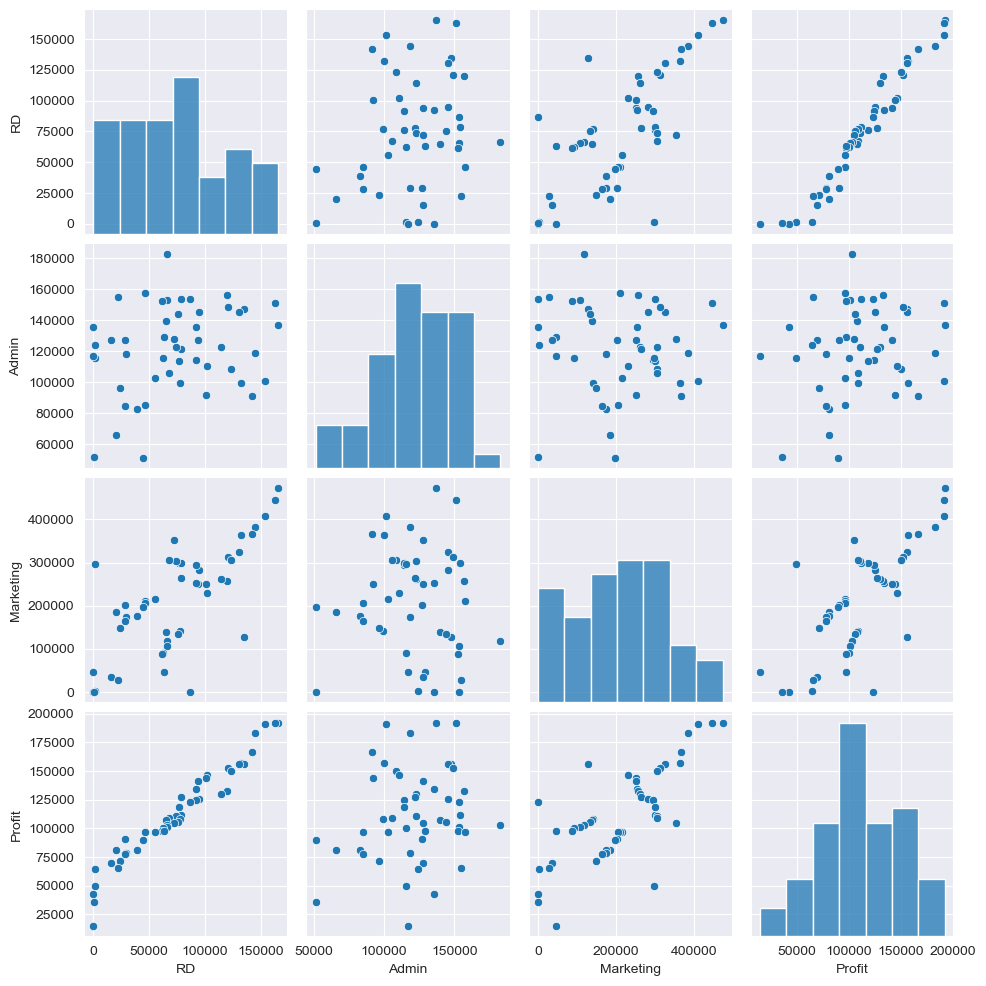

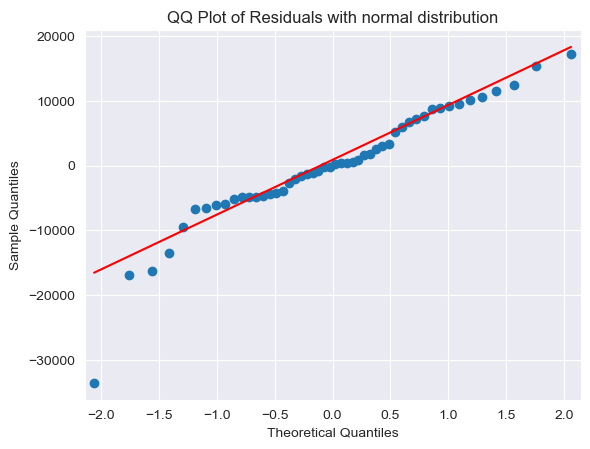

In [101]:
#Assumption 2) Residual Analysis
#Residuals should be normally distributed
#And Mean of the residuals must be near 0

sm.qqplot(model.resid,line='q')
plt.title('QQ Plot of Residuals with normal distribution')
plt.show()

In [102]:
print(np.where(model.resid<-30000))

(array([49], dtype=int64),)


In [103]:
model.resid.mean()

4.351022653281689e-11

Mean of residuals is near 0.

# Checking for Homoscedasticity and Hetroscedasticity

In [104]:
def get_standardized_values(vals):
    return (vals-vals.mean())/vals.std()  #using formula z=(x-mu)/sigma

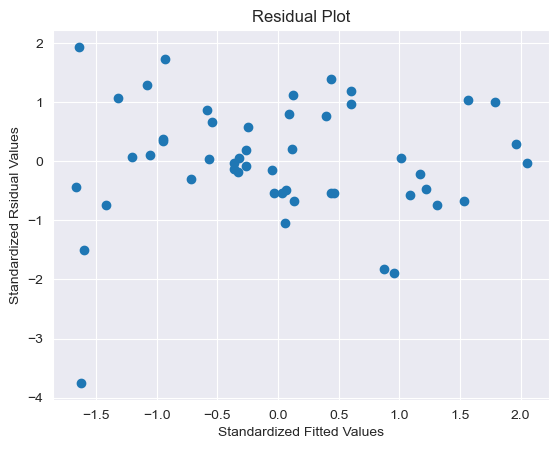

In [105]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title("Residual Plot")
plt.xlabel("Standardized Fitted Values")
plt.ylabel("Standardized Rsidual Values")
plt.show()

The Residuals dont follow any specific pattern and are between +2 and -2 (except one). So we can say it has Homoscedasticity.

In [106]:
#Conducting residual vs regressor test
#We will use Residuals Regression Plots from Statsmodels

eval_env: 1


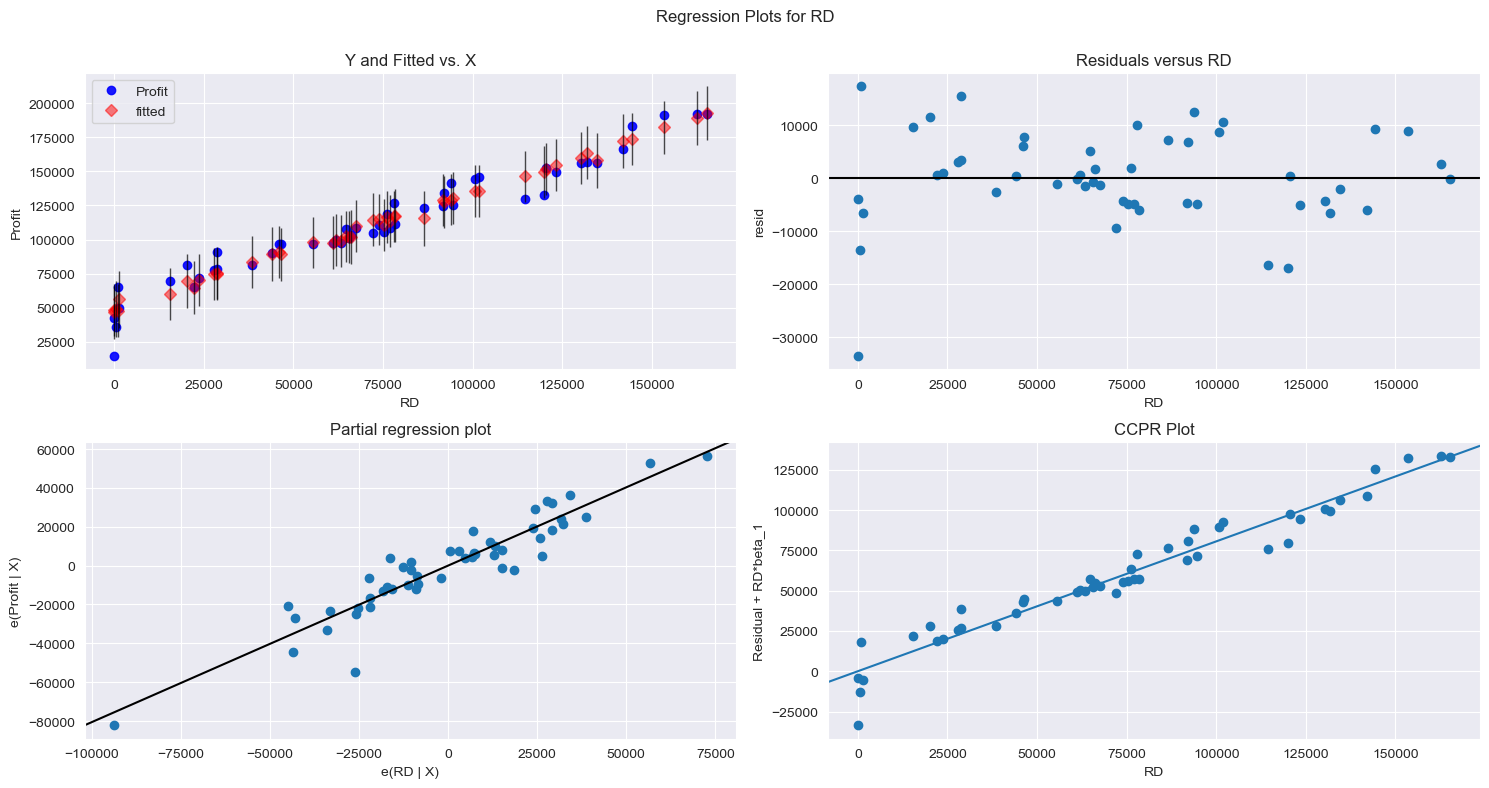

In [107]:
#Plot for RD
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"RD",fig=fig)
plt.show()

Here Plot 1 shows us the Independent variable (RD in this case) on X axis VS our Target variable (Profit) on Y axis.
Blue Dots are our original values of target variable and Orange Dots are Predicted Values. The Black Line indicates Confidence Interval for Predicted values.

Plot 2 Shows us Homoscedasticity or Hetroscedasticity.

Plot 3 Shows us Partial regression plot, It independently identifies relation between  Target and One dependent variable.

Plot 4 is called Component and Component-Plus-Residual plot.

eval_env: 1


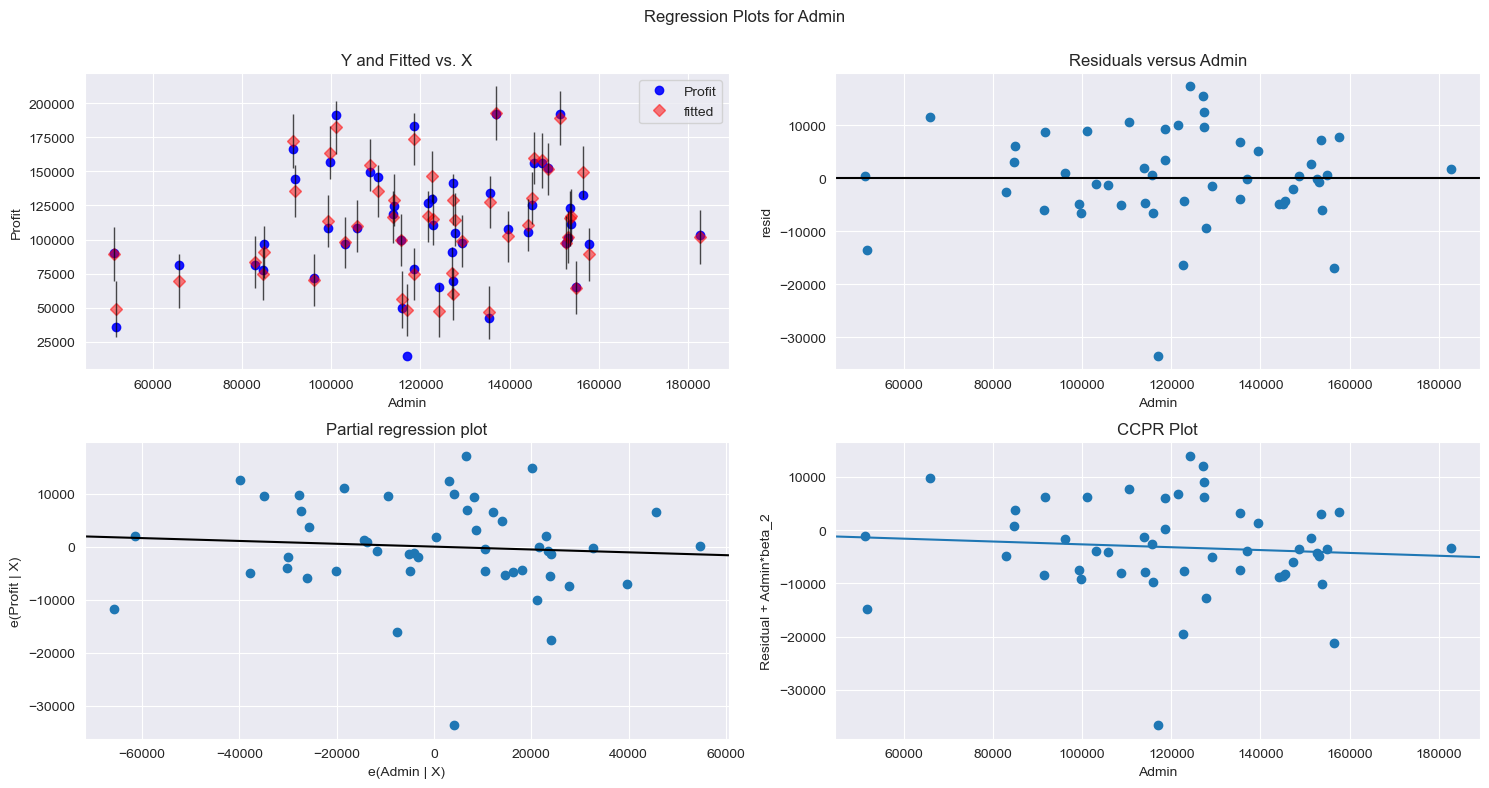

In [108]:
#Plot for Admin
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Admin",fig=fig)
plt.show()

eval_env: 1


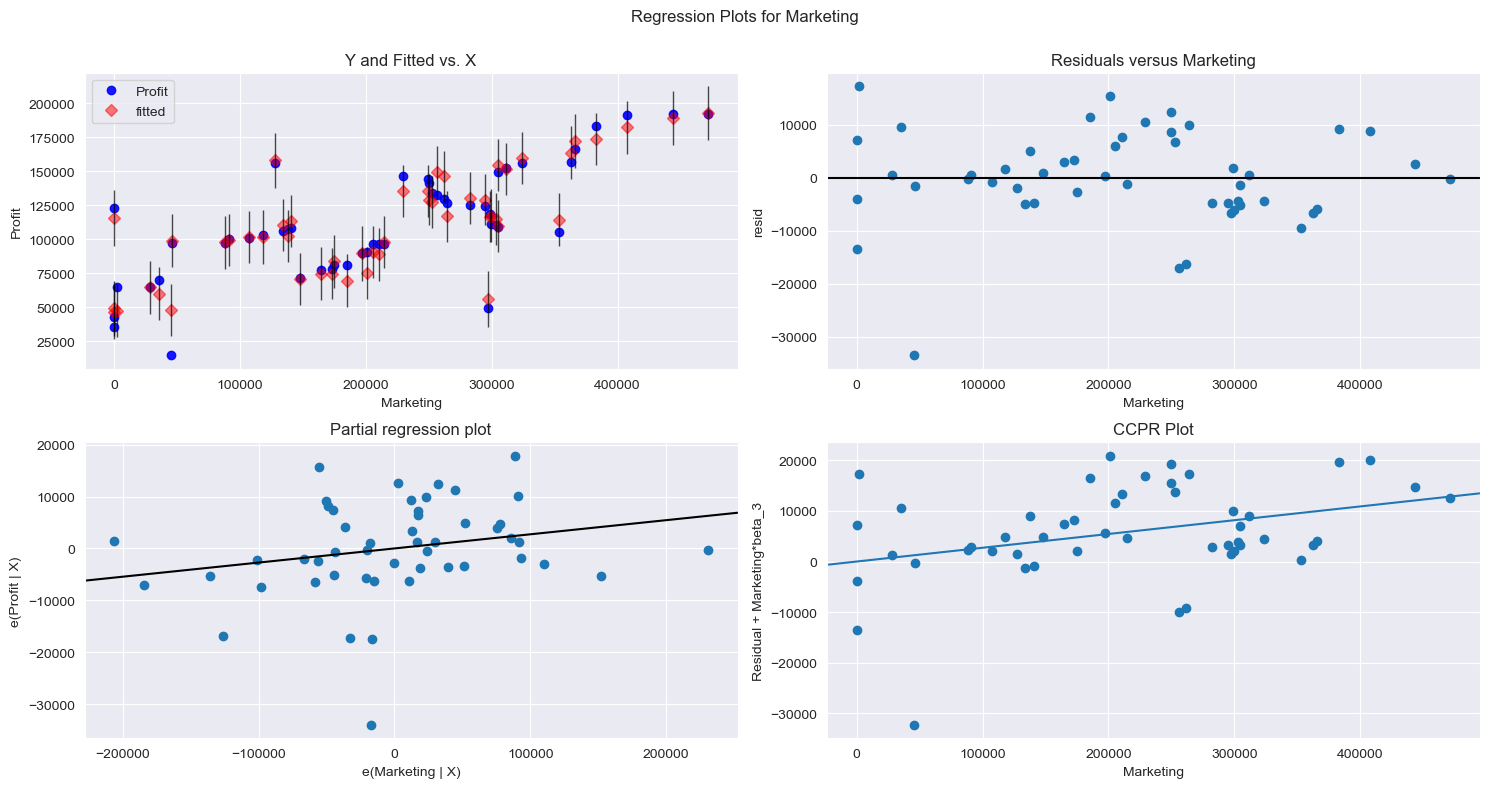

In [109]:
#Plot for Marketing
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Marketing",fig=fig)
plt.show()

# Model Deletion Diagnostics

In [110]:
#1. Cooks Distance 
#If cooks distance is greater than 1 then its an outlier

(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

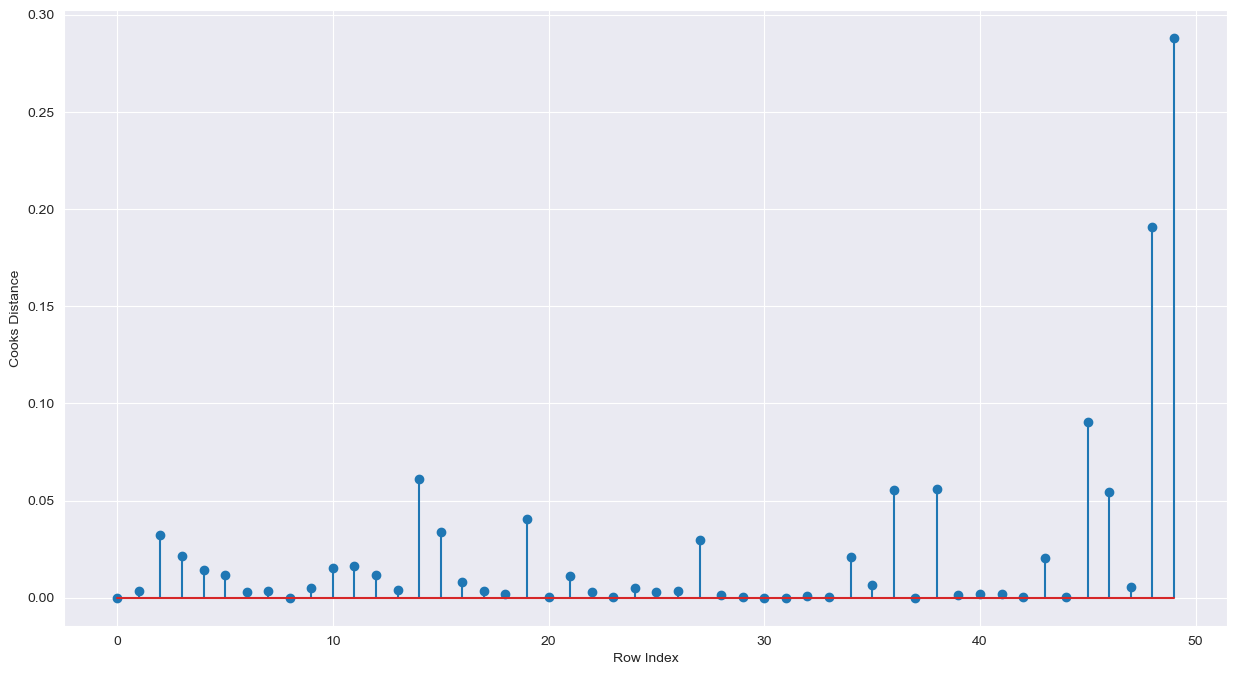

In [111]:
#Plotting Stem Plot
fig=plt.figure(figsize=(15,8))
plt.stem(np.arange(len(df)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [112]:
np.argmax(c),np.max(c) #getting Index and value of Influencer

(49, 0.28808229275432584)

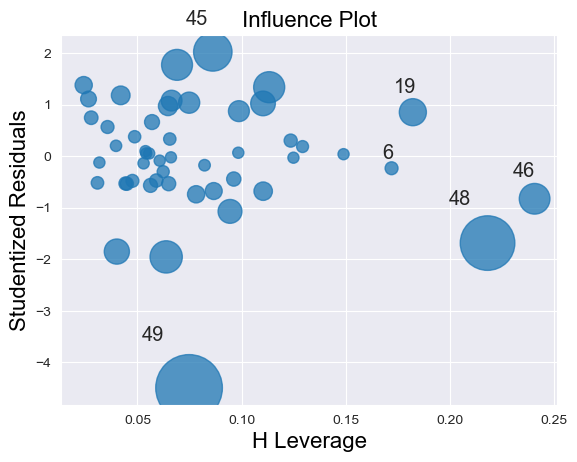

In [113]:
#2. Leverage Values : Points higher than Leverage_cutoff value are influencers
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [114]:
#Levergae value = 3*(k+1)/n ; k=no. of columns or features and n=no. of observations or datapoint
k=df.shape[1]
n=df.shape[0]
Leverage_cutoff = 3*(k+1)/n
Leverage_cutoff

0.36

In [115]:
df[df.index.isin([49])]

,RD,Admin,Marketing,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [116]:
df1=df.drop(df.index[[49]],axis=0).reset_index(drop=True)
df1.tail()

,RD,Admin,Marketing,State,Profit
44,22177.74,154806.14,28334.72,California,65200.33
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41


In [117]:
final_model=smf.ols('Profit~ RD + Admin + Marketing', data=df1).fit()

In [118]:
final_model.rsquared

0.9613162435129847

# Model Predictions

In [119]:
Prediction=final_model.predict(df1)
Prediction

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

# Table containing R^2 value for each prepared model

In [120]:
b={'Models':['model','final_model'],
   'Rsqr':[model.rsquared,final_model.rsquared]}

rsqr=pd.DataFrame(b)
rsqr

,Models,Rsqr
0,model,0.950746
1,final_model,0.961316
